In [13]:
from poliastro.bodies import Earth
from poliastro.twobody import Orbit
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import odeint
from astropy.time import Time
from astropy.coordinates import EarthLocation, AltAz, get_body_barycentric, get_body_barycentric_posvel
from astropy import units as u
from astropy.coordinates import EarthLocation, AltAz, get_body
from astropy.time import Time
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import odeint
from astropy.time import Time
from astropy.coordinates import EarthLocation, AltAz, get_body_barycentric, get_body_barycentric_posvel
from astropy import units as u
from astropy.coordinates import EarthLocation, AltAz, get_body, SkyCoord

In [38]:
from astropy.time import Time
# ISS spacecraft observation
Eccentricity = 0.0005771
Inclination = 51.6409 # deg
Perigee_Height = 415 # km
Apogee_Height = 423 # km
raan = 88.8414 # deg
Argument_of_Perigee = 75.2083 # deg
True_Anomaly = 0 # deg
R_Earth = 6378.1363 # km
a = (Apogee_Height+Perigee_Height)/2 + R_Earth  # Semi-major axis in km

# Create an Orbit object from the orbital elements
ISS = Orbit.from_classical(Earth, a * u.km, Eccentricity * u.one, Inclination * u.deg,
                            raan * u.deg, Argument_of_Perigee * u.deg, True_Anomaly * u.deg)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


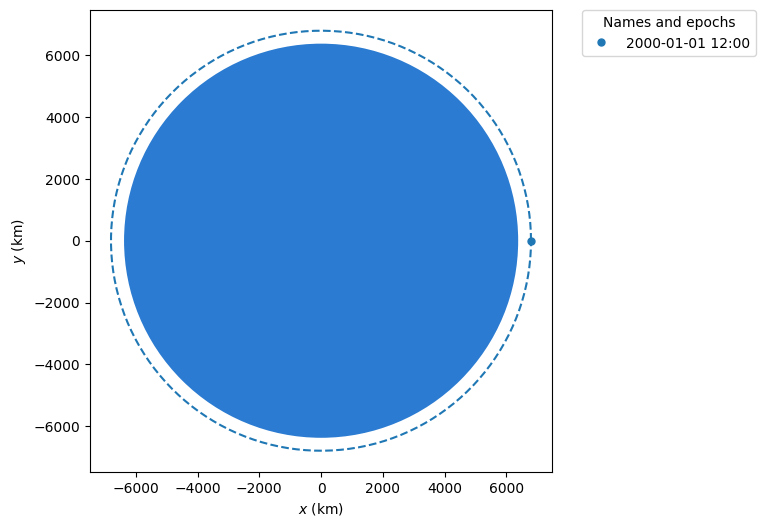

In [39]:
ISS.plot()
# save figure
plt.savefig('../../Figure/Q3/orbiral.eps', format='eps', dpi=1000)

In [16]:
# Simulation of ISS in GCRF for 48 hours


# Constants
mu = 398600.4418 # km^3/s^2
J2 = 1.082626925638815e-3
Re = 6378.1363 # km
omega = 7.2921158553e-5 # rad/s

# Initial conditions
r0 = np.array([ISS.r.value[0], ISS.r.value[1], ISS.r.value[2]])
v0 = np.array([ISS.v.value[0], ISS.v.value[1], ISS.v.value[2]])

# Time span
t = np.linspace(0, 24*3600, 24*3600+1)

# Function to compute the acceleration
def acceleration(r, t):
    r_mag = np.linalg.norm(r)
    r_hat = r/r_mag
    a = -mu/r_mag**2*r_hat
    ## addingg J2 perturbation forces ##
    a[0] = a[0] + 3/2*J2*mu*Re**2/r_mag**4*(1-5*r[2]**2/r_mag**2)*r[0]/r_mag
    a[1] = a[1] + 3/2*J2*mu*Re**2/r_mag**4*(1-5*r[2]**2/r_mag**2)*r[1]/r_mag
    a[2] = a[2] + 3/2*J2*mu*Re**2/r_mag**4*(3-5*r[2]**2/r_mag**2)*r[2]/r_mag
    return a

# Function to compute the derivative of the state vector
def state_dot(state, t):
    r = state[:3]
    v = state[3:]
    r_dot = v
    v_dot = acceleration(r, t)
    return np.concatenate((r_dot, v_dot))

# Solving the differential equation
state = odeint(state_dot, np.concatenate((r0, v0)), t)

In [17]:
# simulation without J2 effect #
r0 = np.array([ISS.r.value[0], ISS.r.value[1], ISS.r.value[2]])
v0 = np.array([ISS.v.value[0], ISS.v.value[1], ISS.v.value[2]])

def acceleration_without_J(r, t):
    r_mag = np.linalg.norm(r)
    r_hat = r/r_mag
    a = -mu/r_mag**2*r_hat
    return a

# Function to compute the derivative of the state vector
def state_dot_without_J(state, t):
    r = state[:3]
    v = state[3:]
    r_dot = v
    v_dot = acceleration_without_J(r, t)
    return np.concatenate((r_dot, v_dot))

# Solving the differential equation
state_without_J = odeint(state_dot_without_J, np.concatenate((r0, v0)), t)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


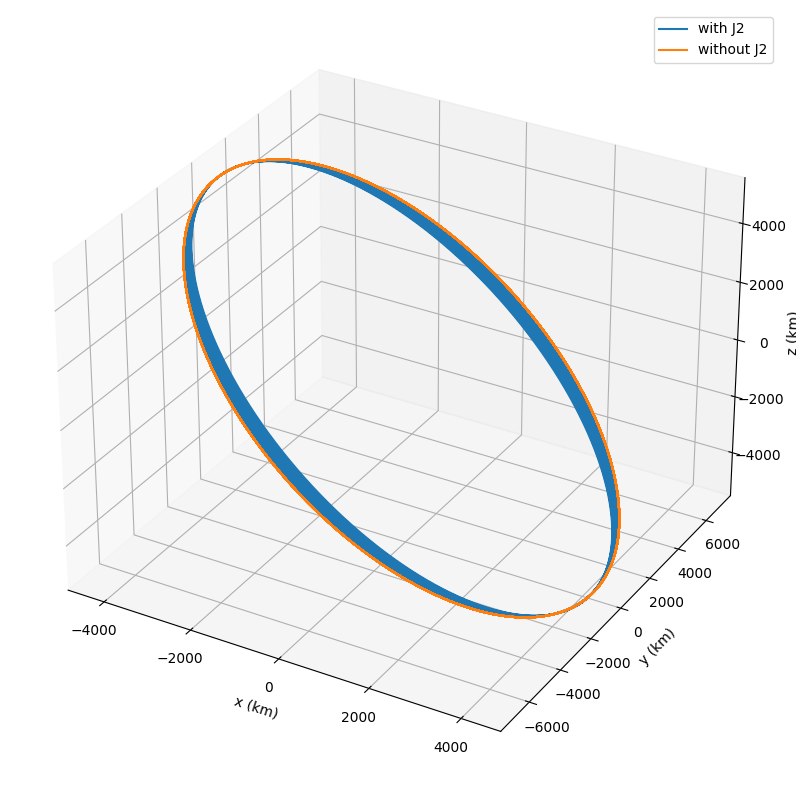

In [18]:
## plot compare trjactory with and without J2 ##
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot(state[:, 0], state[:, 1], state[:, 2], label='with J2')
ax.plot(state_without_J[:, 0], state_without_J[:, 1], state_without_J[:, 2], label='without J2')
ax.set_xlabel('x (km)')
ax.set_ylabel('y (km)')
ax.set_zlabel('z (km)')
ax.legend()

# save figure
plt.savefig('../../Figure/Q3/ISS_trajectory.eps', format='eps', dpi=1000)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


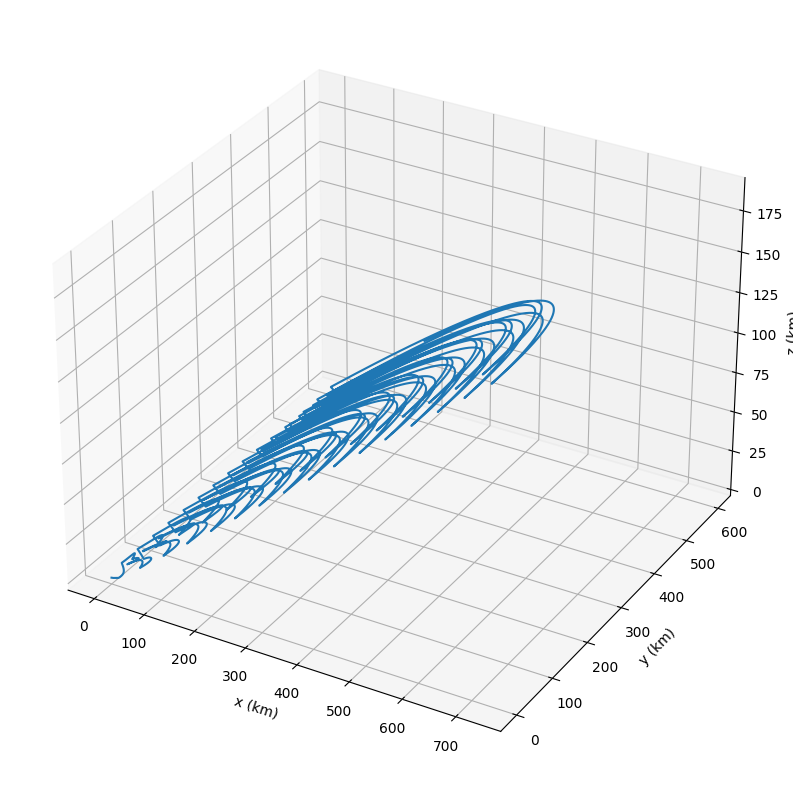

In [21]:
## plot difference ##
## plot compare trjactory with and without J2 ##
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot(np.abs(state[:, 0]-state_without_J[:, 0]), np.abs(state[:, 1]-state_without_J[:, 1]), np.abs(state[:, 2]-state_without_J[:, 2]), label='with J2')
ax.set_xlabel('x (km)')
ax.set_ylabel('y (km)')
ax.set_zlabel('z (km)')

# save figure
plt.savefig('../../Figure/Q3/ISS_trajectory_error_3D.eps', format='eps', dpi=1000)

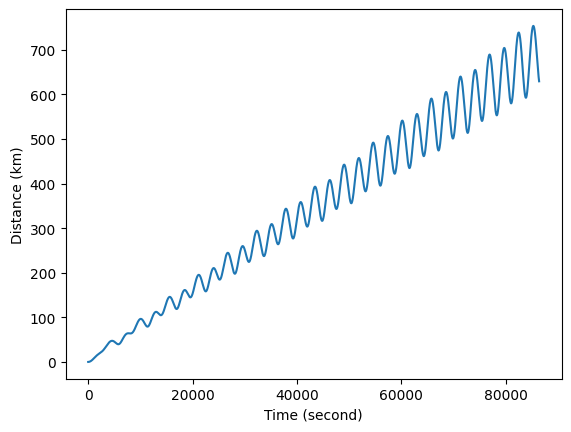

In [22]:
## plot difference ##
## plot compare trjactory with and without J2 ##
# fig = plt.figure(figsize=(10, 10))
plt.plot(t, np.linalg.norm((state[:, 0:3]-state_without_J[:, 0:3]), axis=1))
plt.xlabel('Time (second)')
plt.ylabel('Distance (km)')
plt.savefig('../../Figure/Q3/ISS_trajectory_error_all.eps', format='eps', dpi=1000)

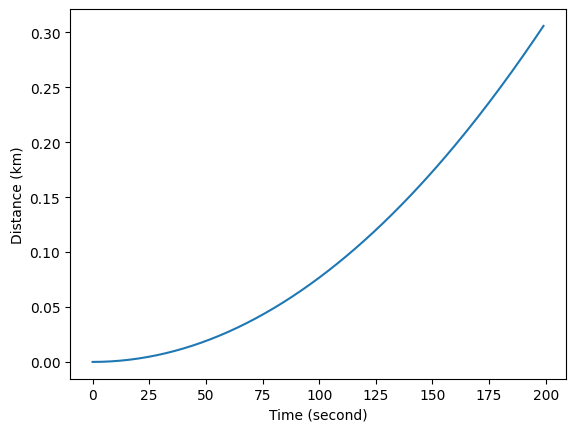

In [23]:
## plot difference ##
## plot compare trjactory with and without J2 ##
# fig = plt.figure(figsize=(10, 10))
plt.plot(t[0:200], np.linalg.norm((state[0:200, 0:3]-state_without_J[0:200, 0:3]), axis=1))
plt.xlabel('Time (second)')
plt.ylabel('Distance (km)')
plt.savefig('../../Figure/Q3/ISS_trajectory_error_min.eps', format='eps', dpi=1000)